# FAKE NEWS CLASSIFICATION USING LSTM

Dataset: [FakeNews](https://www.kaggle.com/c/fake-news/data)



### <div style="text-align: right; color: #4CAF50;">By Prashant Sundge</div>
- [Kaggle : Prashant Kumar Sundge](https://www.kaggle.com/prashantkumarsundge)
- [Github : prashantsundge](https://github.com/prashantsundge)
- [Linked In : prashantsundge](https://www.linkedin.com/in/prashantsundge/)


## INDEX TABLE

1. [Download and Load Dataset](#download-and-load-dataset)
2. [Distribution Plot on Target Variable](#distribution-plot-on-target-variable)
3. [Data Preprocessing](#data-preprocessing)
   - [Lowering the text](#lowering-the-text)
   - [Removing special symbols](#removing-special-symbols)
   - [Removing tags (\n etc)](#removing-tags-n-etc)
   - [Removing web tags (www. @ etc)](#removing-web-tags-www--etc)
   - [Removing numbers/figures](#removing-numbersfigures)
4. [Text Cleaning](#text-cleaning)
   - [Lowering the text](#lowering-the-text-1)
   - [Removing special symbols](#removing-special-symbols-1)
   - [Removing tags (\n etc)](#removing-tags-n-etc-1)
   - [Removing web tags (www. @ etc)](#removing-web-tags-www--etc-1)
   - [Removing numbers/figures](#removing-numbersfigures-1)
5. [Tokenize and Remove Stopwords](#tokenize-and-remove-stopwords)
6. [One Hot Encoding](#one-hot-encoding)
7. [Embedding Representation](#embedding-representation)
   - [Feature Creation for Each vector](#feature-creation-for-each-vector)
      - [Sequential](#sequential)
      - [LSTM](#lstm)
      - [Dense](#dense)
8. [Model Compile](#model-compile)
9. [Model Summary](#model-summary)
10. [Data Splitting and Preparation](#data-splitting-and-preparation)
    - [Train Test Split](#train-test-split)
11. [Model Training](#model-training)
12. [Observations](#observations)
13. [Model Predict](#model-predict)
14. [Metrics Observations](#metrics-observations)
15. [Model Evaluation](#model-evaluation)
    - [History Graph Observations](#history-graph-observations)
16. [Test Data](#test-data)
17. [Submission File](#submission-file)

# DOWNLOAD AND LOAD DATASET

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


- Mount Google Drive to access files, enabling interaction with files stored in your Google Drive directly from the Colab notebook environment.
- Set the Kaggle API token directory to a specific folder in your Google Drive, ensuring that the Kaggle API can access your Kaggle credentials securely.
- Download the dataset from Kaggle using the Kaggle API, allowing you to fetch datasets directly from Kaggle competitions or datasets.
- Unzip the downloaded files to extract the dataset contents for further processing and analysis.
- Read the train, test, and submission data into pandas DataFrames, enabling easy manipulation and analysis of the dataset using pandas, a powerful data manipulation library in Python.
- Return the train, test, and submission DataFrames, providing access to the dataset within the notebook for exploration, preprocessing, and modeling tasks.

In [4]:
from google.colab import drive
import os
import pandas as pd

def download_and_load_fake_news_dataset():
    # Mount Google Drive to access files
    drive.mount('/content/drive')

    # Set the Kaggle API token directory
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

    # Download the dataset using the Kaggle API
    !kaggle competitions download -c fake-news

    # Unzip the downloaded files
    !unzip fake-news.zip

    # Read the train and test data into pandas DataFrames
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")
    submit = pd.read_csv("submit.csv")

    return train, test , submit




- Load the fake news dataset using the download_and_load_fake_news_dataset() function, which downloads and loads the dataset from Kaggle.
- Assign the returned DataFrames to variables train, test, and submit.
- Check the shapes of the loaded DataFrames using the shape attribute, which returns the number of rows and columns in each DataFrame.
- Print the shapes of the train, test, and submit DataFrames to the console for inspection.

In [5]:
# Call the function to download and load the dataset
train ,test, submit = download_and_load_fake_news_dataset()

# Check the shapes of the loaded DataFrames
print("Shape of train dataset:", train.shape)
print("Shape of test dataset:", test.shape)
print("Shape of Submit dataset", submit.shape)

Mounted at /content/drive
 95% 44.0M/46.5M [00:02<00:00, 25.7MB/s]
100% 46.5M/46.5M [00:02<00:00, 18.8MB/s]
Archive:  fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               
Shape of train dataset: (20800, 5)
Shape of test dataset: (5200, 4)
Shape of Submit dataset (5200, 2)


In [6]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [195]:
submit.head()

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1


# DISTRIBUTION PLOT ON TARGET VARIABLE

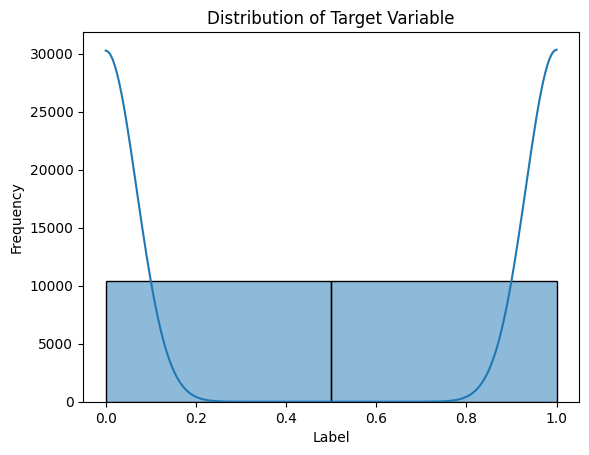

In [7]:
# Create a distribution plot for the target variable train['label']
sns.histplot(data=train, x='label', bins=2, kde=True)  # Assuming label is binary
plt.title('Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


- A balanced dataset refers to a scenario where each class or category within the target variable is represented by a similar number of observations or instances.
- In a balanced dataset, the model is not biased towards any particular class, allowing it to learn effectively from all classes equally.
- Balanced datasets are highly desirable in machine learning tasks as they mitigate issues such as class imbalance, where one class dominates the dataset, potentially leading to biased predictions.


In [8]:
train.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


# DATA PREPROCESSING


- Checked the shape of the DataFrame before preprocessing.
- Printed a separator line for better readability.
- Displayed the data information using `df.info()`, providing insights into the DataFrame's structure and data types.
- Checked and printed the count of null values in each column using `df.isnull().sum()`.
- Dropped rows with null values using `df.dropna()` and updated the DataFrame accordingly.
- Checked and printed the count of null values after dropping rows using `df.isnull().sum()`.
- Printed a separator line for better readability.
- Printed the count of duplicate values in the DataFrame using `df.duplicated().sum()`.
- Checked the shape of the DataFrame after preprocessing and returning the updated DataFrame.

In [9]:
def data_preprocessing(df):
  print(df.shape)
  print('\n', "+"*50 ,'\n')
  print("Data Information")
  print(df.info())
  print('\n', "+"*50 ,'\n')
  print("Data Null Values")
  print(df.isnull().sum())
  df = df.dropna()
  print("Data Null Values after Dropna")
  print(df.isnull().sum())
  print('\n', "+"*50 ,'\n')
  print("Duplicate values count")
  print('\n', "+"*50 ,'\n')
  print(df.duplicated().sum())
  print(df.shape)
  return df

In [10]:
train1 = data_preprocessing(train)

(20800, 5)

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Data Null Values
id           0
title      558
author    1957
text        39
label        0
dtype: int64
Data Null Values after Dropna
id        0
title     0
author    0
text      0
label     0
dtype: int64

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Duplicate values count

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

0
(18285, 5)


# TEXT CLEANING

- lowering the text
- removing the special symbols
- removing the tags [\n etc]
- Removing the Web tags [www. @ etc]
- removing numbers/figures

- Converted the text in the 'text' column to lowercase using `df['text'].str.lower()`.
- Removed HTML tags from the text in the 'text' column using regular expressions (`re.sub(r'<[^>]*>', '', x)`).
- Removed numbers from the text in the 'text' column using regular expressions (`re.sub(r'\d+', '', x)`).
- Removed taglines and newlines from the text in the 'text' column using regular expressions (`re.sub(r'[\n\t]', '', x)`).
- Removed double quotes, single quotes, and hyphens from the text in the 'text' column using regular expressions (`re.sub(r'[\'\"\-]', '', x)`).
- Removed special quote characters from the text in the 'text' column using regular expressions (`re.sub(r'[’‘“”]', '', x)`).
- Removed URLs, website addresses, and log words with a single character repetition from the text in the 'text' column using regular expressions (`re.sub(r'(www\w*|http\w*|\\|\b\w*(\w)\2{5,}\w*\b)', '', x)`).
- Removed punctuation from the text in the 'text' column using list comprehension and the `string.punctuation` constant.
- Printed a separator line for better readability.
- Displayed the completion message "Data Cleaning is completed Successfully".
- Returned the updated DataFrame after text cleaning.


In [11]:
import re
import string
import warnings
warnings.filterwarnings('ignore')

def text_cleaning(df):
  try:
      df['text']= df['text'].str.lower()
      print("Data Lower case successfull")
      # Remove HTML tags from the text in the 'text' column
      df['text'] = df['text'].apply(lambda x: re.sub(r'<[^>]*>', '', x))
      print("data html tags removed successfull")
      df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
      print("data Numbers removed successfull")
      df['text'] = df['text'].apply(lambda x: re.sub(r'[\n\t]', '', x))
      print("data TagLines/Newlines removed successfull")
      df['text'] = df['text'].apply(lambda x: re.sub(r'[\'\"\-]', '', x))
      print("data Double quote, single quote hypen removed successfull")
      df['text'] = df['text'].apply(lambda x: re.sub(r'[’‘“”]', '', x))

      # remove http, www log words with sigle char wwwaaaaayyyyy downhillthe etc
      df['text'] = df['text'].apply(lambda x: re.sub(r'(www\w*|http\w*|\\|\b\w*(\w)\2{5,}\w*\b)' , '', x))
      print("data website tags removed successfull")
      # Punctuation removal
      df['text'] = df['text'].apply(lambda x: "".join(char for char in x if char not in string.punctuation))
      print("data punctuation removed successfull")
      print('\n', "+"*50 ,'\n')
      print("Data Cleaning is completed Successfully")
      return df
  except Exception as e:
      raise e

In [12]:
df1 = text_cleaning(train1)

Data Lower case successfull
data html tags removed successfull
data Numbers removed successfull
data TagLines/Newlines removed successfull
data Double quote, single quote hypen removed successfull
data website tags removed successfull
data punctuation removed successfull

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Data Cleaning is completed Successfully


- we can see we have large text which is around 23891 words in review which will take lot of time to process

- we will set the max text limit to 100

In [14]:
df2 = df1.copy()

- This function truncates the text in the 'text' column of a DataFrame to contain at most 100 words.
- It iterates over each row, splits the text into words, and counts the number of words. If the number of words exceeds 100, it truncates the text to the first 100 words.
- This helps to standardize the length of text entries in the DataFrame.

In [16]:
def replace_text(df):
    # Iterate over DataFrame rows
    for index, row in df.iterrows():
        # Split the text into words and count the number of words
        text_words = row['text'].split()
        num_words = len(text_words)

        # Check if the number of words is less than 5
        if num_words > 100:

            df.at[index, 'text'] = ' '.join(text_words[:100])

    return df



In [17]:
df5 = replace_text(df2)

In [18]:
df5

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,house dem aide we didnt even see comeys letter...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,why the truth might get you fired october the ...,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,videos civilians killed in single us airstrike...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,print an iranian woman has been sentenced to s...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,rapper t i unloaded on black celebrities who m...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,when the green bay packers lost to the washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,the macys of today grew from the union of seve...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,nato russia to hold parallel exercises in balk...,1


In [20]:
x= df5['text']

In [21]:
y= df5['label']

 ## TOKENIZE AND REMOVE STOPWORDS

- Import the pandas library as pd for working with DataFrames.
- Import the nltk library for natural language processing tasks.
- Import the word_tokenize function from the nltk.tokenize module to tokenize words.
- Import the stopwords corpus from the nltk.corpus module to remove common stopwords from text data.
- Import the WordNetLemmatizer class from the nltk.stem module for lemmatization.
- Download the 'punkt' dataset if it's not already downloaded, which contains pre-trained tokenizers for various languages.
- Download the 'stopwords' dataset if it's not already downloaded, which contains a list of common stopwords in various languages.
- Download the 'wordnet' dataset if it's not already downloaded, which is a lexical database for the English language that provides information about word meanings and relationships between words.


In [63]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Download stopwords if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

This function tokenizes, removes stopwords, and lemmatizes text data.

- Initialize a WordNetLemmatizer object named lemmatizer for lemmatization.
- Create an empty list named tokenized_X to store the tokenized and processed text data.
- Create a set of stopwords for the English language using the stopwords.words('english') function.
- Iterate over each text in the input data X.
  - Tokenize the text using the word_tokenize function from the NLTK library.
  - Remove stopwords and lemmatize each word using list comprehension.
  - Join the filtered and lemmatized words into a single string.
  - Append the processed text to the tokenized_X list.
- Return the tokenized and processed text data stored in tokenized_X.


In [91]:
def tokenize_remove_stopwords_lemmatize(X):
    lemmatizer = WordNetLemmatizer()
    tokenized_X = []
    stop_words = set(stopwords.words('english'))

    for text in X:
        # Tokenize the text
        words = word_tokenize(text)
        # Remove stopwords and lemmatize
        filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
        # Append the filtered and lemmatized words to the tokenized list
        filtered_words = ' '.join(filtered_words)
        tokenized_X.append(filtered_words)

    return tokenized_X

# Example usage:
# Assuming X is your input data
# tokenized_X = tokenize_remove_stopwords_lemmatize(X)


In [92]:
tokenized_X = tokenize_remove_stopwords_lemmatize(x)


# ONE HOT ENCODING

This function performs one-hot encoding on a list of tokenized text data.

- Import the one_hot function from the tensorflow.keras.preprocessing.text module.
- Define a variable vocab_size to specify the size of the vocabulary.
- Define the onehotencoding function that takes two parameters: tokenized_X (the list of tokenized text data) and vocab_size (the size of the vocabulary).
- Iterate over each word in the tokenized text data using a list comprehension.
- Apply one-hot encoding to each word using the one_hot function with the specified vocabulary size.
- Store the one-hot encoded representations of words in a list named onehot_rep.
- Return the list of one-hot encoded representations of words.


In [94]:
from tensorflow.keras.preprocessing.text import one_hot

In [95]:
vocab_size = 20000

In [96]:
def onehotencoding(tokenized_X, vocab_size):
    onehot_rep = [one_hot(word, vocab_size) for word in tokenized_X]
    return onehot_rep



In [97]:
onehot_rep_x = onehotencoding(tokenized_X , vocab_size)

In [104]:
len(tokenized_X[0].split())

60

In [105]:
len(onehot_rep_x[0])

60

# EMBEDDING REPRESENTATION

This function pads sequences of one-hot encoded text data to a specified length.

- Import the Embedding layer from the tensorflow.keras.layers module.
- Import the pad_sequences function from the tensorflow.keras.preprocessing.sequence module.
- Define a variable sent_length to specify the maximum length of the sequences.
- Define the ebedded function that takes two parameters: text (the list of one-hot encoded text data) and sent_length (the maximum length of the sequences).
- Use the pad_sequences function to pad the sequences in text with zeros before (pre-padding) to ensure they have a uniform length of sent_length.
- Return the padded sequences stored in ebedded_doc.
- Example usage: embedded_X = ebedded(onehot_rep_x, sent_length)


In [106]:
sent_length = 120

In [108]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
def ebedded(text , sent_length):
  ebedded_doc= pad_sequences(text, padding='pre', maxlen = sent_length)
  return ebedded_doc


In [112]:
embedded_X = ebedded(onehot_rep_x, sent_length)

In [113]:
embedded_X

array([[    0,     0,     0, ...,  3647, 16487,  8930],
       [    0,     0,     0, ..., 10215,  3577, 18462],
       [    0,     0,     0, ..., 14267, 13024, 17140],
       ...,
       [    0,     0,     0, ...,  6534, 19005,  1747],
       [    0,     0,     0, ...,  3694,  5277, 16277],
       [    0,     0,     0, ..., 10240,  6033, 12018]], dtype=int32)

# Feature Creation for Each vector

This function defines a sequential model architecture for text classification using an embedding layer and LSTM layer.

- Import the Sequential class from the tensorflow.keras.models module.
- Import the LSTM and Dense layers from the tensorflow.keras.layers module.
- Define the model function that takes three parameters: vocab_size (the size of the vocabulary), features (the dimensionality of the embedding space), and sent_length (the maximum length of sequences).
- Create a Sequential model object named model.
- Add an Embedding layer to the model with vocab_size as the input dimension, features as the output dimension, and input_length as sent_length.
- Add an LSTM layer to the model with 100 units.
  - In Keras, when you add an LSTM layer using model.add(LSTM(100)), the number 100 represents the number of units or neurons in the LSTM layer.
- Add a Dense layer to the model with one unit and a sigmoid activation function for binary classification.
- Compile the model with binary_crossentropy as the loss function, adam as the optimizer, and accuracy as the evaluation metric.
- Print a summary of the model architecture using model.summary().
- Return the compiled model.


In [114]:
features = 40

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [132]:
def model(vocab_size,features,sent_length):
  model = Sequential()
  model.add(Embedding(vocab_size, features , input_length = sent_length))
  model.add(LSTM(100))
  '''
  In Keras, when you add an LSTM layer using model.add(LSTM(100)),
  the number 100 represents the number of units or neurons in the LSTM layer.

  '''
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics=['accuracy'])
  print(model.summary())
  return model



In [133]:
model = model(vocab_size,features,sent_length)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 40)           800000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 856501 (3.27 MB)
Trainable params: 856501 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# DATA SPLITING AND MAKE IT READY FOR X , Y

- Print the shape of the target variable y using the y.shape attribute.
- Assign the embedded sequences to the variable X.
- Print the shape of the input data X using the X.shape attribute.
- Print the shape of the target variable y again to ensure consistency.


In [122]:
y.shape

(18285,)

In [125]:
X = embedded_X

In [126]:
print("X shape",X.shape)
print("y Shape",y.shape)

X shape (18285, 120)
y Shape (18285,)


# TRAIN TEST SPLIT

Split the dataset into training and testing sets using the train_test_split function from the sklearn.model_selection module.

- Assign the input data X and the target variable y to X_train, X_test, y_train, and y_test respectively.
- Set the test_size parameter to 0.25 to split the data into 75% training and 25% testing sets.
- Use a random state of 123 for reproducibility.


In [129]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [130]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (13713, 120)
X_test shape (4572, 120)
y_train shape (13713,)
y_test shape (4572,)


#MODEL TRAINING

- Train the model using the fit() function, providing the training data X_train and y_train.
- Set the validation_data parameter to (X_test, y_test) to use the testing data for validation during training.
- Set the number of epochs to 10 using the epochs parameter.
- Set the batch size to 64 using the batch_size parameter.


In [131]:
model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs =10 , batch_size=64)
#modelf with LSTM(200) neurons

Epoch 1/10
215/215 [==============================] - 87s 393ms/step - loss: 0.4221 - accuracy: 0.7850 - val_loss: 0.2300 - val_accuracy: 0.9156
Epoch 2/10
215/215 [==============================] - 85s 393ms/step - loss: 0.1296 - accuracy: 0.9595 - val_loss: 0.2254 - val_accuracy: 0.9237
Epoch 3/10
215/215 [==============================] - 88s 411ms/step - loss: 0.0497 - accuracy: 0.9870 - val_loss: 0.2878 - val_accuracy: 0.9204
Epoch 4/10
215/215 [==============================] - 83s 386ms/step - loss: 0.0252 - accuracy: 0.9944 - val_loss: 0.4062 - val_accuracy: 0.9154
Epoch 5/10
215/215 [==============================] - 84s 390ms/step - loss: 0.0282 - accuracy: 0.9921 - val_loss: 0.2956 - val_accuracy: 0.9105
Epoch 6/10
215/215 [==============================] - 86s 402ms/step - loss: 0.0230 - accuracy: 0.9939 - val_loss: 0.3547 - val_accuracy: 0.9066
Epoch 7/10
215/215 [==============================] - 87s 404ms/step - loss: 0.0217 - accuracy: 0.9940 - val_loss: 0.4032 - val_ac

## OBSERVATION
Observations from the training and validation metrics for the last epoch (Epoch 10/10):

- The loss on the training dataset is very low (0.0080), indicating that the model has achieved a good fit to the training data.
- The accuracy on the training dataset is high (99.77%), indicating that the model is able to correctly classify the majority of the samples in the training set.
- The validation loss is relatively higher (0.4962) compared to the training loss, indicating that the model may be slightly overfitting to the training data.
- The validation accuracy is also high (90.97%), indicating that the model is performing well on the unseen validation data.

Overall, the model appears to perform well on both the training and validation datasets, with high accuracy and relatively low loss. However, there may be some degree of overfitting, as evidenced by the higher validation loss compared to the training loss. Regularization techniques or model adjustments may be necessary to address this issue and improve generalization performance.

**Reduce Model Complexity:** If your model is too complex, it may overfit the training data. Try reducing the number of layers, the number of units in each layer, or using regularization techniques such as dropout or L2 regularization.

- accuracy: 0.9977
- val_accuracy: 0.9097

In [192]:
history = model.fit(X_train, y_train, validation_data =(X_test, y_test), epochs =10 , batch_size=64)
#modelLSTM with 100 neuron

Epoch 1/10
215/215 [==============================] - 47s 217ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.5868 - val_accuracy: 0.9088
Epoch 2/10
215/215 [==============================] - 41s 192ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.4709 - val_accuracy: 0.8933
Epoch 3/10
215/215 [==============================] - 44s 206ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.5723 - val_accuracy: 0.9049
Epoch 4/10
215/215 [==============================] - 47s 218ms/step - loss: 0.0164 - accuracy: 0.9950 - val_loss: 0.5020 - val_accuracy: 0.8898
Epoch 5/10
215/215 [==============================] - 51s 239ms/step - loss: 0.0114 - accuracy: 0.9968 - val_loss: 0.4757 - val_accuracy: 0.9062
Epoch 6/10
215/215 [==============================] - 44s 204ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.5246 - val_accuracy: 0.9075
Epoch 7/10
215/215 [==============================] - 44s 205ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.6142 - val_ac

# MODEL PREDICT

- Compute the accuracy score between the true labels (y_test) and the predicted labels (y_pred) using the accuracy_score function from sklearn.metrics.
- Compute the confusion matrix between the true labels (y_test) and the predicted labels (y_pred) using the confusion_matrix function from sklearn.metrics.
- Compute the classification report, including precision, recall, F1-score, and support, between the true labels (y_test) and the predicted labels (y_pred) using the classification_report function from sklearn.metrics.
- Print the computed accuracy score.
- Print a separator line for better readability.
- Print the computed confusion matrix.
- Print a separator line for better readability.
- Print the computed classification report.

In [135]:
y_pred = model.predict(X_test)

143/143 [==============================] - 8s 49ms/step


In [137]:
y_pred = np.where(y_pred > 0.5, 1,0)

In [142]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [158]:
def metrics_result(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  accuracy
  confusion = confusion_matrix(y_test, y_pred)
  classification  = classification_report(y_test, y_pred)
  print(accuracy)
  print('\n', "+"*50 ,'\n')
  print(confusion)
  print('\n', "+"*50 ,'\n')
  print(classification)

# Metrix Observations:
- The computed accuracy score is approximately 0.907, indicating that the model achieved an accuracy of around 90.7% on the test data.
- The confusion matrix shows that the model correctly predicted 2319 true negatives (TN), 1826 true positives (TP), 253 false positives (FP), and 174 false negatives (FN).
- The classification report provides a detailed breakdown of precision, recall, F1-score, and support for both classes (0 and 1). Overall, the model performs well, with high precision, recall, and F1-score for both classes, indicating good performance in classifying both true and fake news articles.

In [159]:
metrics_result(y_test, y_pred)

0.9066054243219598

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

[[2319  253]
 [ 174 1826]]

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      2572
           1       0.88      0.91      0.90      2000

    accuracy                           0.91      4572
   macro avg       0.90      0.91      0.91      4572
weighted avg       0.91      0.91      0.91      4572



# MODEL EVALUTION

# Graph Observations:
- The accuracy plot shows that the model achieves near-perfect accuracy (99%) on the training dataset, indicating that it has learned the training data well. However, the accuracy on the testing dataset is around 90%, suggesting a slight drop in performance on unseen data, which could indicate overfitting.
- The loss plot shows a decreasing trend in both training and testing loss over epochs, which indicates that the model is learning and improving its performance. However, there may be some overfitting as the training loss continues to decrease while the testing loss stabilizes or increases slightly.

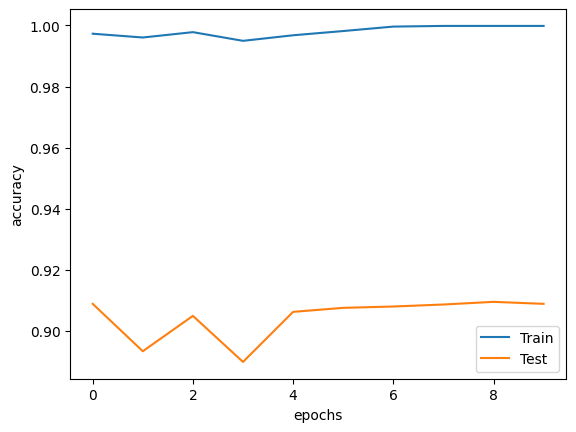

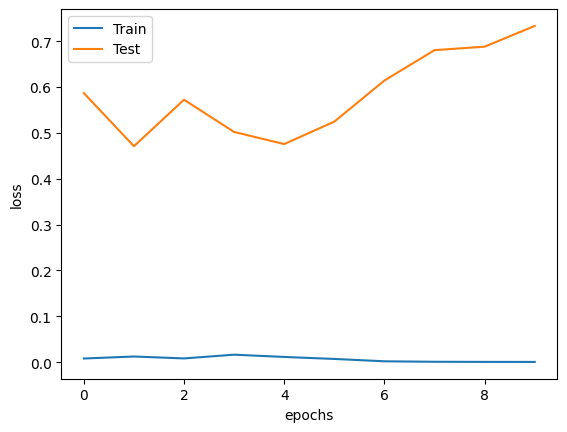

In [193]:
# Assuming you have trained your model and stored the history object as 'history'

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()


# TEST DATA

In [145]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


Define the test_data_process function that takes a DataFrame df as input.

- Preprocess the DataFrame by performing data preprocessing using the data_preprocessing function.
- Clean the text data in the DataFrame using the text_cleaning function to lowercase the text, remove HTML tags, numbers, special characters, stopwords, and perform lemmatization.
- Replace text in the DataFrame with a maximum of 100 words using the replace_text function.

Return the processed DataFrame.


In [146]:
def test_data_process(df):
  df = data_preprocessing(df)
  df = text_cleaning(df)
  df = replace_text(df)

  return df

In [147]:
test_df = test_data_process(test)

(5200, 4)

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB
None

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Data Null Values
id          0
title     122
author    503
text        7
dtype: int64
Data Null Values after Dropna
id        0
title     0
author    0
text      0
dtype: int64

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

Duplicate values count

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

0
(4575, 4)
Data Lower case successfull
data html tags removed successfull
data Numbers removed successfull
data TagLines/Newlines removed successfull
data Double quote, sing

In [152]:
test_df

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,palo alto calif — after years of scorning the ...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,videos nodapl native american leaders vow to s...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,if at first you dont succeed try a different s...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,mins ago views comments likes for the firs...
6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,sunday on nbcs meet the press house minority l...
...,...,...,...,...
5194,25994,Trump on If ’Tapes’ Exist of Comey Conversatio...,Pam Key,pres trump on if tapes exist of his conversati...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,of all the dysfunctions that plague the worlds...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,washington — gov john kasich of ohio on tuesda...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,good morning want to get california today by e...


In [153]:
test = test_df['text']

Define the nlp_preprocess function that takes three parameters: test (the input text data), vocab_size (the size of the vocabulary), and sent_length (the maximum length of sequences).

- Tokenize, remove stopwords, and lemmatize the input text data using the tokenize_remove_stopwords_lemmatize function.
- Perform one-hot encoding on the tokenized text data using the onehotencoding function with the specified vocabulary size.
- Pad the one-hot encoded sequences to the specified length using the ebedded function.

Return the padded sequences representing the preprocessed text data.


In [154]:
def nlp_preprocess(test, vocab_size , sent_length):

  tokenized_X = tokenize_remove_stopwords_lemmatize(test)
  onehot_rep_x = onehotencoding(tokenized_X , vocab_size)
  embedded_test = ebedded(onehot_rep_x, sent_length)

  return embedded_test

In [155]:
embeded_test = nlp_preprocess(test, vocab_size , sent_length)

In [157]:
test_pred = model.predict(embeded_test)

143/143 [==============================] - 5s 32ms/step


In [162]:
test_pred = np.where(test_pred > 0.5 , 1,0)

In [165]:
len(test_pred)

4575

In [166]:
len(submit['label'])

5200

# SUBMISSION

- Create a DataFrame test_id containing the 'id' column from the test DataFrame using pd.DataFrame.
- Generate predictions for the test data using the trained model and the preprocessed test data (embeded_test), thresholding the predictions at 0.5 to convert them to binary labels (0 or 1) using the model.predict method.
- Compute performance metrics such as accuracy, confusion matrix, and classification report using the metrics_result function with the true labels from the 'label' column of the submit DataFrame and the predicted labels.
- Reset the index of the test_id DataFrame to ensure consistency.
- Convert the NumPy array of predictions to a DataFrame with column name "label" using pd.DataFrame.
- Concatenate the test_id and predictions_test_df DataFrames along the columns axis using pd.concat.
- Rename the columns of the concatenated DataFrame to "id" and "label" using the .columns attribute.
- Save the concatenated DataFrame to a CSV file named "Submission.csv" using to_csv, excluding the index.


In [170]:
test_id = pd.DataFrame(test_df["id"])
prediction_test = (model.predict(embeded_test) > 0.5).astype("int32")

143/143 [==============================] - 6s 43ms/step


In [187]:
metrics_result(submit['label'][:4575] , prediction_test)

0.49901639344262294

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

[[1140  918]
 [1374 1143]]

 ++++++++++++++++++++++++++++++++++++++++++++++++++ 

              precision    recall  f1-score   support

           0       0.45      0.55      0.50      2058
           1       0.55      0.45      0.50      2517

    accuracy                           0.50      4575
   macro avg       0.50      0.50      0.50      4575
weighted avg       0.51      0.50      0.50      4575



In [182]:
# Reset the index of test_id DataFrame
test_id.reset_index(drop=True, inplace=True)
# Convert the NumPy array to a DataFrame
predictions_test_df = pd.DataFrame(prediction_test, columns=["label"])
# Concatenate DataFrames
submission = pd.concat([test_id, predictions_test_df], axis=1)
submission.columns = ["id","label"]
submission.to_csv("Submission.csv",index=False)

In [186]:
submission.head(20)

,id,label
0,20800,0
1,20802,1
2,20803,0
3,20804,1
4,20806,0
5,20807,1
6,20810,1
7,20811,1
8,20812,1
9,20813,1
